## Exercise 2 
### 2.a) Refractor the PNSR definition such that the PSNR is expressed as a function of the noise variance $σ_z ^2 $. You may assume that $σ_z ^2  = MSE(x, y)$ 
- PSNR original definition 
    <br> 
    
    (1) $ PSNR = 10 \log_{10} \frac{a^2}{MSE(x,y)} $ 
    <br>
    
    (2) $MSE(x,y) = \sigma _{z} ^2 $
    <br>
    
    (1) (2) $ PSNR = 10 \log_{10} \frac{a^2}{\sigma _{z} ^2} $ 
    <br> 
    
     $ PSNR = 20 \log_{10} a - 10\log_{10}{\sigma _{z} ^2}  $ 
    <br> 
    
     $ PSNR - 20 \log_{10} a  = 10\log_{10}{\sigma _{z} ^2}  $ 
    <br> 
    
     $ \frac{PSNR - 20 \log_{10} a }{10} = \log_{10}{\sigma _{z} ^2}  $ 
    <br> 
    
     (3) $ 10^ {\frac{PSNR - 20 \log_{10} a }{10}} = \sigma _{z} ^2  $ 
    
    This relationship above is used in 2.b.


### 2.b) Add Gaussian noise to an image such that the PSNR ratio with the original image is 10dB, 20dB, 30dB and 40dB. Use randn, not imnoise.
- Noise function:
$Z_i= N(\mu, \sigma ^2 )$


original image


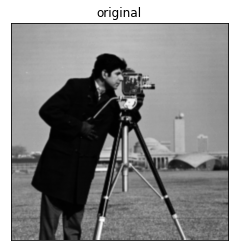

In [6]:
#2b
import cv2
import numpy as np
import math 
import matplotlib.pyplot as plt

def readTifGrayScale(path):
    img = cv2.imread(path, -1)
    return img

def showTifGrayScale(img, title = ""):
    plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.title(title)
    plt.show()

def mse(imageA, imageB) -> float:
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	return err
PSNRs = [10, 20, 30, 40]
getVarianceForPSNR = lambda db: 10**((db-20 * math.log(255, 10))/10)
varianceList = [(db, getVarianceForPSNR(db)) for db in PSNRs ]

def gaussianNoise(image, var, mean = 0):
      row,col = image.shape
      sigma = var**0.5
      randomGaus = np.random.normal(mean,sigma,(row,col))
      gaussNoiseMatrix = randomGaus.reshape(row,col)
      noisy = image + gaussNoiseMatrix
      return noisy, gaussNoiseMatrix

imgCam = readTifGrayScale('./data/cameraman.tif')
imgCam_double = np.array(imgCam).astype("float32")
imgCam_double = np.interp(
    imgCam_double, 
    (imgCam_double.min(), imgCam_double.max()), 
    (0, 1)
)

print("original image")
showTifGrayScale(imgCam, "original")



### 2.c) Show the noisy images on the screen. How do they look?

They look bad the more db we have 



DB:  10
variance:  0.00015378700499807824
DB:  20
variance:  0.0015378700499807825
DB:  30
variance:  0.015378700499807824
DB:  40
variance:  0.1537870049980782


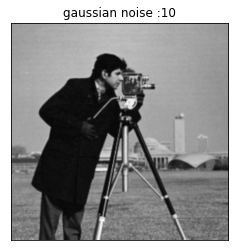

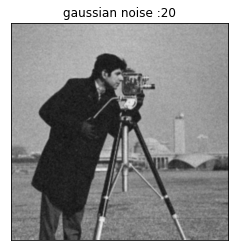

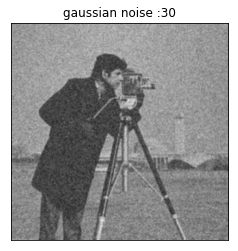

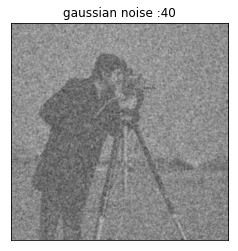

In [7]:

### 2.c) Show the noisy images on the screen. How do they look?

def experiment(db, variance, img):
    print("DB: ",db)
    print("variance: ", variance)
    noisedImgArray, gaussNoiseMatrix = gaussianNoise(img, variance)
    showTifGrayScale(noisedImgArray, "gaussian noise :" + str(db))
    return noisedImgArray
    
noised_images = [(db, experiment(db,var, imgCam_double )) for db,var in iter(varianceList)]


### 2.d) Show the histograms for these noisy images, can you explain what you see?
The more noisy the image the higher the difference wiht the original graph.
We see the count for every pixel value of the image.
Original image: 


original image
DB:  10
variance:  0.00015378700499807824
DB:  20
variance:  0.0015378700499807825
DB:  30
variance:  0.015378700499807824
DB:  40
variance:  0.1537870049980782
mse:  8.611372090968196e-05
psnr:  40.649276448227084
mse:  0.09461500561318495
psnr:  10.240399805305422


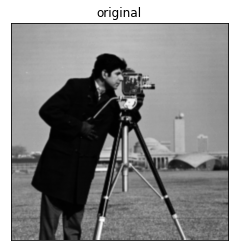

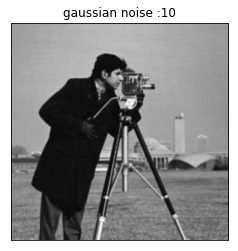

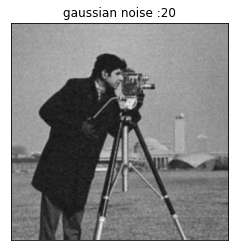

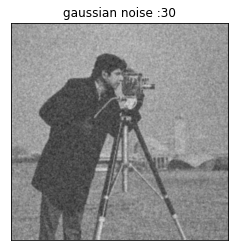

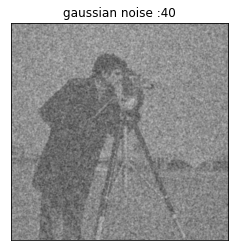

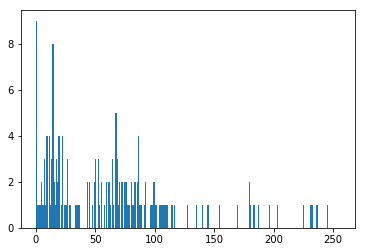

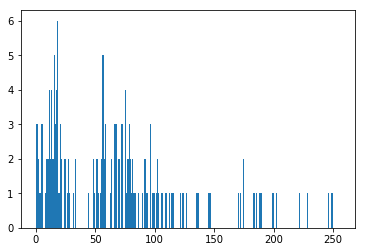

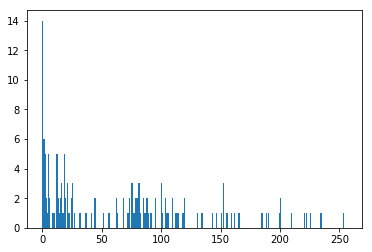

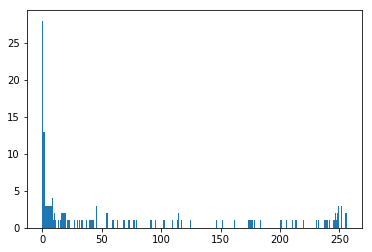

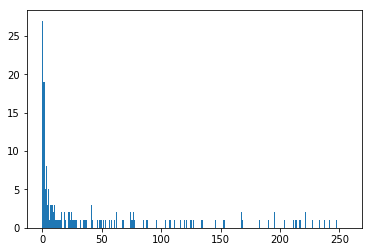

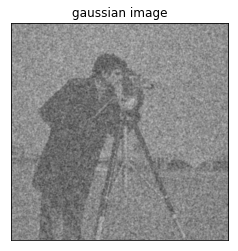

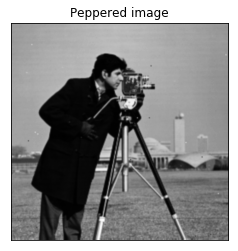

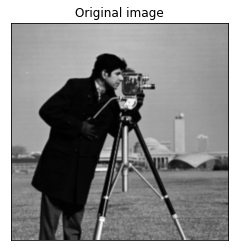

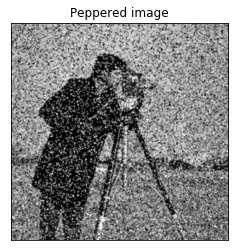

In [5]:
### 2.d) Show the histograms for these noisy images, can you explain what you see?
def convertBack(im):
    imconv= np.interp(
        im, 
        (im.min(), im.max()), 
        (0, 255)
    )
    imconv = imconv.astype("uint8")
    return imconv

def hist(img):
    imconv = convertBack(img)
    hist , bins = np.histogram(imconv.ravel(),256,[0,256])
    plt.hist(hist, bins= bins)
    plt.show()


hist(imgCam_double)
[ hist(im) for db, im in iter(noised_images)]



### 2.e1) Add salt & pepper Noise to an image until the PSNR ratio between the original and the noisy image is 40 dB. 
The noise and pepper function is imlemented below 

### 2.e.2) Visually compare it to the 40dB noisy image to which Gaussian noise was added. What can you conclude?
With salt and pepper noise function the picture is barely modified at 40db.
While with gaussia noise it is geavily modified.

To validate that the salt and pper nois is coorectly implemented I trie to augmenta the noise heavily.


In [ ]:

### 2.e.1) Add salt & pepper Noise to an image until the PSNR ratio between the original and the noisy image is 40 dB. 
import copy 
def psnr(mseres):
    PIXEL_MAX_SQUARE = 1
    mse_square = math.sqrt(mseres )
    part1 =  math.log10(PIXEL_MAX_SQUARE / mse_square)
    return 20 * part1

imgCam = readTifGrayScale('./data/cameraman.tif')
imgCam_double = np.array(imgCam).astype("float32")
imgCam_double = np.interp(
    imgCam_double, 
    (imgCam_double.min(), imgCam_double.max()), 
    (0, 1)
)

def get_img_with_pepper_salt_noise(img, p, q):
    im = copy.deepcopy(img)
    randnums = np.random.rand(256,256)
    im[np.logical_and(randnums > p, randnums < q)] = 1
    im[ randnums <= p] = 0
    return im 

pepperedImg = get_img_with_pepper_salt_noise(imgCam_double, p=0.00015, q=0.0003)
mseNum  = mse(imgCam_double,pepperedImg)
print("mse: ", mseNum)
print("psnr: ", psnr(mseNum))
showTifGrayScale(noised_images[3][1], "gaussian image")
showTifGrayScale(pepperedImg, "Peppered image")
showTifGrayScale(imgCam_double, "Original image")

### 2.e.2) Visually compare it to the 40dB noisy image to which Gaussian noise was added. What can you conclude?
pepperedImg = get_img_with_pepper_salt_noise(imgCam_double, p=0.15, q=0.3)
mseNum  = mse(imgCam_double,pepperedImg)
print("mse: ", mseNum)
print("psnr: ", psnr(mseNum))
showTifGrayScale(pepperedImg, "Peppered image")
